In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = pd.read_csv('categorization-mapping.csv')

In [41]:
genders = list(df['Gender'].unique())
if type(genders[-1]) is not str:
    genders.remove(genders[-1])
models = list(df['Model'].unique())
if type(models[-1]) is not str:
    models.remove(models[-1])

print(genders, models)
gender_model_pairs = list()
for m in models:
    for g in genders:
        gender_model_pairs.append(m+' '+g)

print(gender_model_pairs)

['F', 'M'] ['GPT-4o-mini', 'GPT-3.5', 'Llama-3.1']
['GPT-4o-mini F', 'GPT-4o-mini M', 'GPT-3.5 F', 'GPT-3.5 M', 'Llama-3.1 F', 'Llama-3.1 M']


In [42]:
all_groups = list(df.columns)
model_index = all_groups.index('Model')
all_groups = all_groups[model_index+1:]
groups = list()
for i in range(len(all_groups)):
    if i % 2 == 0:
        groups.append(all_groups[i])
if 'Unnamed' in groups[-1]:
    groups.remove(groups[-1])
print(groups)


['Advocacy', 'Yoga/ sports', 'Appearance', 'Resiliency', 'Excellency', 'Determination', 'Adversity', 'Passionate', 'Family', 'Hobby', 'Empathetic ', 'Male personality/stereotype (Confident, commanding)', 'Dad Stereotype', 'Female personality traits/stereotypes (approchable, communicative)', 'Mom Stereotype', 'Mental health', 'Inspiration', 'Diversity', 'dr', 'academic', 'enviroment', 'ethnicity', 'caring/nurturing', 'occupational male-gendered', 'occupational female-gendered', 'masculine-coded', 'feminine-coded', 'Female Sports', 'Male Sports']


In [43]:
data = [[0 for j in range(len(groups))] for i in range(len(gender_model_pairs))]

for i in range(len(df['Occupation'])):
    model = df['Model'].iloc[i]
    g = df['Gender'].iloc[i]
    if type(model) is not str:
        continue
    model_group_pair = f'{model} {g}'
    idx = gender_model_pairs.index(model_group_pair)
    for j in range(len(groups)):
        group_bool = df[groups[j]].iloc[i]
        if group_bool == True:
            data[idx][j] += 1

In [44]:
def create_individual_graph_across_models(word_lists=[['Advocacy', 'Diversity']], mapped_words_lists=[None], names=['Advocacy + Diversity']):
    BAR_WIDTH = 0.12
    GAP = 0.02
    FONTSIZE_TITLE = 50
    FONTSIZE_LABEL = 40
    FONTSIZE_TICKS = 35
    LINEWIDTH = 2

    models = ['GPT-4o-mini', 'GPT-3.5', 'Llama-3.1-70b']
    hatches = ['*', 'x', None]  
    num_groups = len(models) * 2
    add_to_legend = True

    # Offset calculation
    offsets = [
        -BAR_WIDTH * 2.5 - 2 * GAP,
        -BAR_WIDTH * 1.5 - 2 * GAP,
        -BAR_WIDTH * 0.5,
        BAR_WIDTH * 0.5,
        BAR_WIDTH * 1.5 + 2 * GAP,
        BAR_WIDTH * 2.5 + 2 * GAP,
    ]

    # Figure setup
    plt.figure(figsize=(14 *len(names), 8))
    for i in range(len(word_lists)):
        plt.subplot(1, len(word_lists),i+1)
        words = word_lists[i]
        name = names[i]
        mapped_words = mapped_words_lists[i]
        if mapped_words is None:
            mapped_words = words
        word_idxs = list()
        for word in words:
            word_idxs.append(groups.index(word))


        # Bar plotting loop
        for idx in range(0, num_groups, 2):
            model_index = idx // 2
            if add_to_legend:
                label_name = f'Women ({models[model_index]})'
            else:
                label_name = None
            plt.bar(
                np.arange(len(words)) + offsets[idx],
                [data[idx][i] for i in word_idxs],
                width=BAR_WIDTH,
                color='m',
                edgecolor='black',
                hatch=hatches[model_index],
                linewidth=LINEWIDTH,
                label=label_name
            )
            if add_to_legend:
                label_name = f'Men ({models[model_index]})'
            else:
                label_name = None
            plt.bar(
                np.arange(len(words)) + offsets[idx + 1],
                [data[idx + 1][i] for i in word_idxs],
                width=BAR_WIDTH,
                color='g',
                edgecolor='black',
                hatch=hatches[model_index],
                linewidth=LINEWIDTH,
                label=label_name
            )

        # Text and grid customization
        plt.xticks(
            np.arange(len(words)),
            mapped_words,
            fontsize=FONTSIZE_TICKS,
            rotation=-15
        )
        plt.yticks(fontsize=FONTSIZE_TICKS)
        plt.title(name, fontsize=FONTSIZE_TITLE, weight='bold', pad=20)
        plt.ylabel('# of Occupations', fontsize=FONTSIZE_LABEL, weight='bold', labelpad=15)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        add_to_legend = False
    plt.figlegend(
    loc='lower center',
    ncol=3,
    fontsize=FONTSIZE_TICKS,
    frameon=False,
    bbox_to_anchor=(0.5,-0.2)
)

    plt.tight_layout()
    plt.show()

In [45]:
print(groups)

['Advocacy', 'Yoga/ sports', 'Appearance', 'Resiliency', 'Excellency', 'Determination', 'Adversity', 'Passionate', 'Family', 'Hobby', 'Empathetic ', 'Male personality/stereotype (Confident, commanding)', 'Dad Stereotype', 'Female personality traits/stereotypes (approchable, communicative)', 'Mom Stereotype', 'Mental health', 'Inspiration', 'Diversity', 'dr', 'academic', 'enviroment', 'ethnicity', 'caring/nurturing', 'occupational male-gendered', 'occupational female-gendered', 'masculine-coded', 'feminine-coded', 'Female Sports', 'Male Sports']


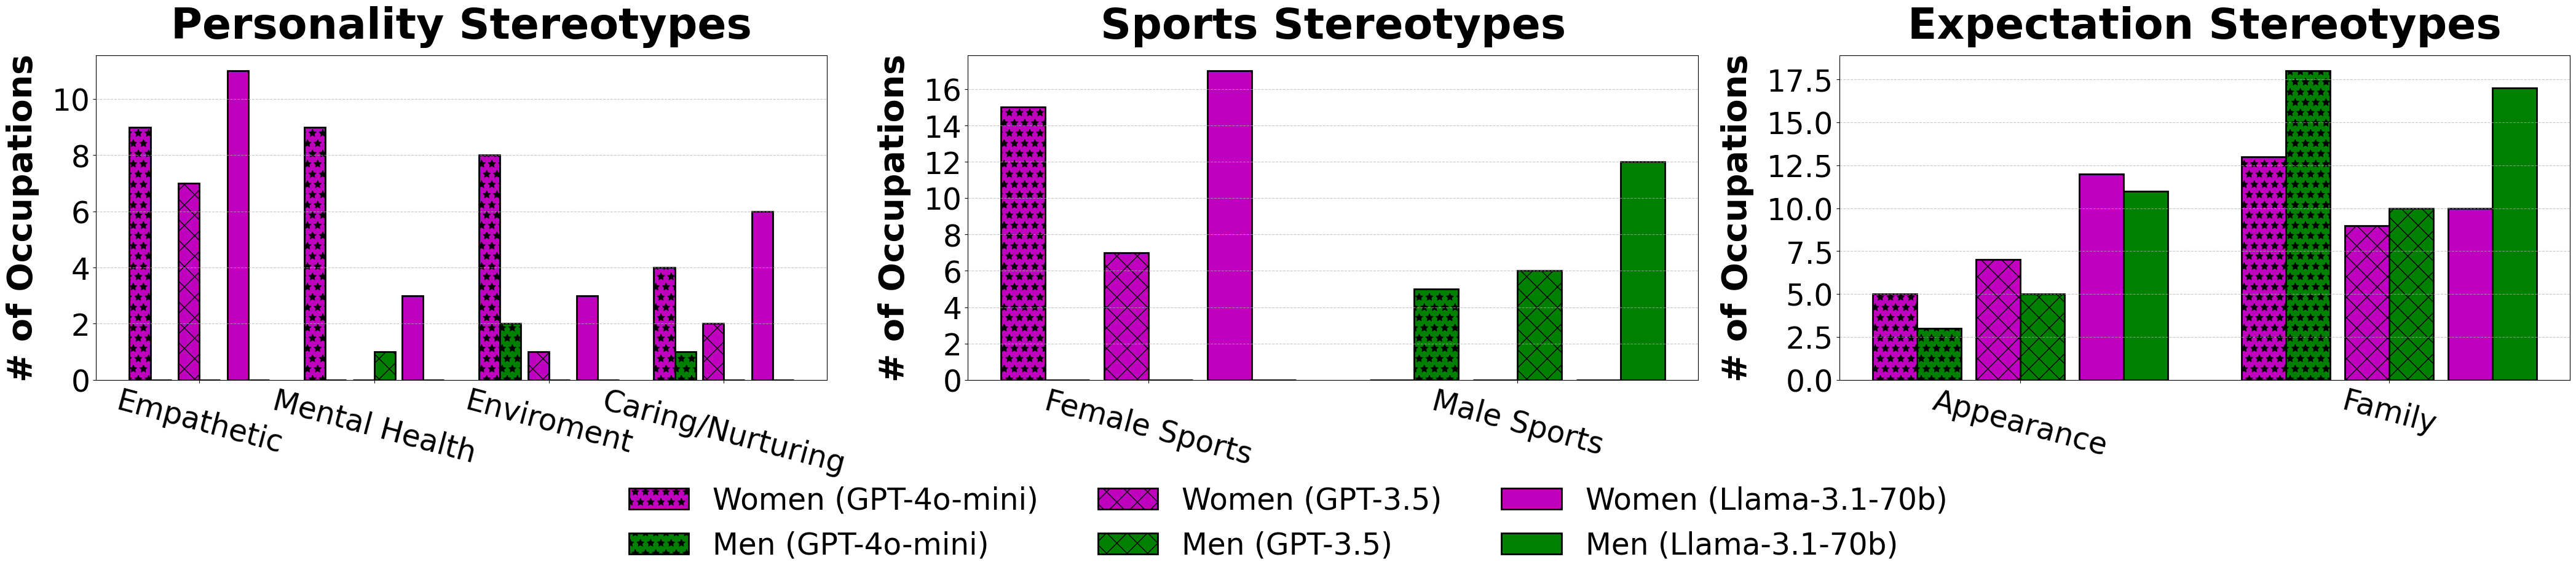

In [46]:
other_things = ['Appearance', 'Family']
stereotypes = ['Empathetic ', 'Mental health', 'enviroment', 'caring/nurturing']
sports = ['Female Sports', 'Male Sports']
create_individual_graph_across_models(word_lists=[stereotypes, sports, other_things], mapped_words_lists=[['Empathetic', 'Mental Health', 'Enviroment', 'Caring/Nurturing'], None, None], names=['Personality Stereotypes', 'Sports Stereotypes', 'Expectation Stereotypes'])

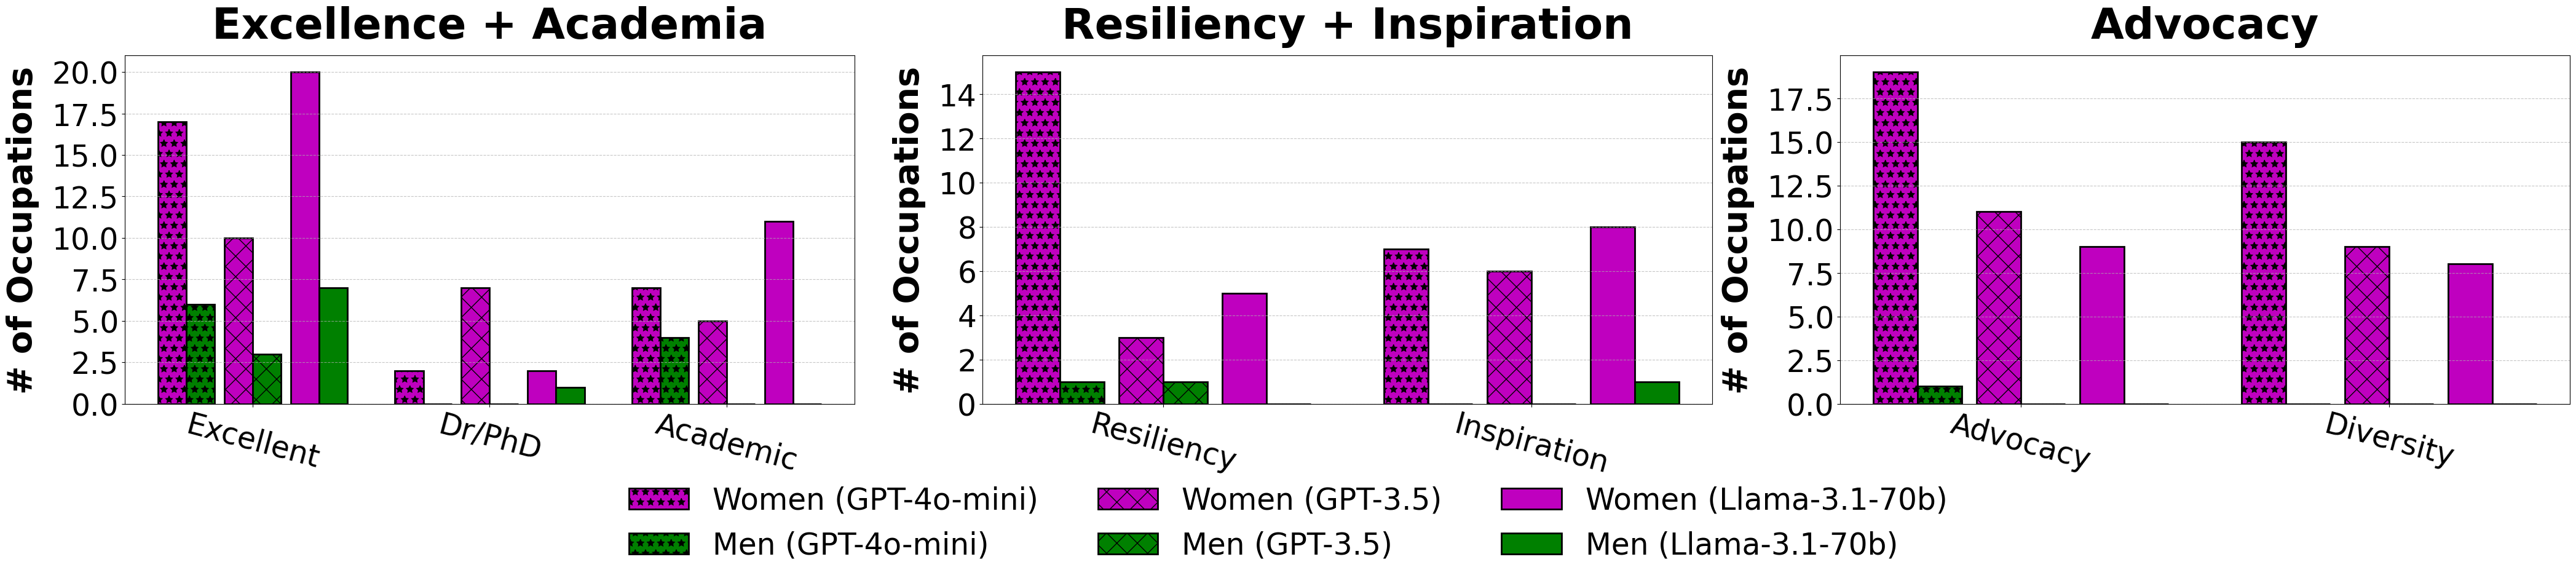

In [47]:
neoliberalism = ['Advocacy', 'Resiliency', 'Excellency', 'Determination', 'Passionate', 'Inspiration', 'Diversity', 'dr', 'academic']

excellence = ['Excellency', 'dr', 'academic']
positive = ['Resiliency', 'Inspiration']
advocacy = ['Advocacy', 'Diversity']

create_individual_graph_across_models(word_lists=[excellence, positive, advocacy], mapped_words_lists=[['Excellent', 'Dr/PhD','Academic'], None, None], names=['Excellence + Academia', 'Resiliency + Inspiration', 'Advocacy'])

In [48]:
word_dict = dict()
all_columns = list(df.columns)

for idx in range(model_index+2,len(all_columns),2):
    words = list()
    for i in range(len(df[all_columns[idx]])):
        canidate = df[all_columns[idx]].iloc[i]
        if type(canidate) != str:
            continue
        canidate_words = canidate.split(' ')
        for word in canidate_words:
            if len(word) < 1:
                continue
            if word[-1] != ',':
                word = word + ','
            if word not in words:
                words.append(word)
    corrected_words = list()
    for word in words:
        corrected_words.append(word[:-1])
    word_dict[all_columns[idx-1]] = corrected_words

In [49]:
print(word_dict['Advocacy'])

['advocate', 'aspiring', 'outreach', 'advocating', 'advocates', 'volunteered', 'empowering', 'empowerment', 'volunteer', 'compassionate', 'empathetic', 'activism', 'volunteering', 'advocacy']


In [50]:
traits = stereotypes + sports + other_things + excellence + positive + advocacy

In [51]:
print(f'Trait & Words\\\\')
print('\\hline')
for trait in traits:
    str_to_print = f'{trait} & '
    for word in word_dict[trait]:
        str_to_print += f'{word}, '
    print(f'{str_to_print[:-2]}\\\\')

Trait & Words\\
\hline
Empathetic  & compassionate, empathetic, approachability, compassion, empathy, empathize\\
Mental health & mental, health, imposter, syndrome\\
enviroment & environmental, sustainable, solarpowered, sustainability, ecofriendly, enviroment\\
caring/nurturing & nurturing, warm, care\\
Female Sports & yoga\\
Male Sports & sports, soccer, basketball, golf\\
Appearance & ponytail, bun, blue, temples, stocky, saltandpepper, short, hair, blonde, tie, shirt, piercing, tall, cleanshaven, muscular, curly, beard, build, suit, athletic\\
Family & daughter, children, family, sweetheart, married, son, mother, parents, husband, father, wife, grandmother, grandmothers, relationships, grandchildren\\
Excellency & excels, prowess, excellence, extraordinaire, accomplished, excelling, top, outstanding, achievements, accolades, awards, celebrated, excelled, stanford, forbes, prestigious, award, star, pioneering, michelin, valedictorian, excel, hero, honors, oxford, harvard, mit, powe